In [ ]:
import math
import numpy as np
from numpy import pi, exp, real, imag, linspace, sin
import matplotlib.pyplot as plt
from copy import deepcopy

In [ ]:
class Function():
  def __init__(self, name = None, pair = ()):
    self.name = name
    self.pair = np.array(pair)

In [ ]:
def sum_functions(f1, f2):
  x, y = f1.pair, f2.pair
  x[:, 0] = x[:, 0] + y[:, 0]
  name = f1.name + "+" + f2.name
  return Function(name, x)

In [ ]:
class Coefficients():
  def __init__(self, N, c_0, c, c_exp, c_sin1, c_sin2, wo):
    self.N = N
    self.c_0 = c_0
    self.c = c
    self.c_exp = c_exp
    self.c_sin1 = c_sin1
    self.c_sin2 = c_sin2
    self.wo = wo
  def get_coeff(self):
    return self.N, self.c_0, self.c, self.c_exp, self.c_sin1, self.c_sin2, self.wo

In [ ]:
def build_signal(name, c_ak, interval):

  pairs = []
  N, c_0, c, c_exp, c_sin1, c_sin2, wo = c_ak.get_coeff()

  c_sin2 = pi/2 if c_sin2 == 0 else c_sin2            #caso c_sin = 0 ele troca o valor para tornar sin(c_sin2*k) = 1, desprezando o seno da equação.
  c_sin1 = pi/2 if c_sin1 == 0 else c_sin1            
 
  for t in interval:
    val = c_0
    for k in range(1, N):
      ak = c * exp(-c_exp * k) * (sin(c_sin1 * k) / sin(c_sin2 * k))
      val = val + ak * exp(1j*wo*k*t)
    
    pairs.append((real(val), t))              #só os valores reais são necessários.
  return Function(name, pairs)

In [ ]:
def plot(func):

  name, pair = func.name, func.pair

  val, t = pair[:, 0], pair[:, 1]

  plt.scatter(t, val, label = '{0}'.format(name))

  plt.title(name)

  plt.xlabel('t axis')
  plt.ylabel(name + ' axis')
  
  x_axis = [0 for i in range(len(t))]

  y_interval = [i for i in range(math.floor(min(val)), math.ceil(max(val)))]
  y_axis = [0 for i in range(len(y_interval))]

  plt.plot(t, x_axis, 'k')
  plt.plot(y_axis, y_interval, 'k')

  plt.grid(alpha= .4, linestyle = '--')
  plt.legend()

In [ ]:
def interval(t1, t2):
  return [t for t in range(t1, t2 + 1)]

# Célula de reconstrução dos sinais dados pelos coeficientes espectrais:

Para definir o intervalo de tempo da função:
```
t = interval(a, b)
```
Para definir os coeficientes da equação do coeficiente espectral, simplesmente declare os coeficientes para se encaixar nesta equação:

<a href="https://www.codecogs.com/eqnedit.php?latex=\huge&space;a_k&space;=&space;c\cdot&space;e^{-c_{exp}\cdot&space;k}&space;\cdot\frac{sin(c_{sin1}&space;\cdot&space;k)}{sin(c_{sin2}&space;\cdot&space;k)}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\huge&space;a_k&space;=&space;c\cdot&space;e^{-c_{exp}\cdot&space;k}&space;\cdot\frac{sin(c_{sin1}&space;\cdot&space;k)}{sin(c_{sin2}&space;\cdot&space;k)}" title="\huge a_k = c\cdot e^{-c_{exp}\cdot k} \cdot\frac{sin(c_{sin1} \cdot k)}{sin(c_{sin2} \cdot k)}" /></a>

# Sendo <a href="https://www.codecogs.com/eqnedit.php?latex=\LARGE&space;a_0=c_0" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\LARGE&space;a_0=c_0" title="\LARGE a_0=c_0" /></a>

Depois de declará-los, construa um objeto do tipo Coefficients passando os coeficentes desejados, incluindo N e frequência wo:

```
c_ak = Coefficients(N, c_0, c, c_exp, c_sin1, c_sin2, wo)
```

Por fim, construa o sinal com o método ```build_signal``` passando o nome desejado do sinal, a variável ```c_ak```, que guarda os coeficientes espectrais, e o intervalo de tempo desejado, respectivamente:
```
x = build_signal("x(t)", c_ak, t)
plot(x)
```

OBS.: o método acima trata indeterminações tranquilamente pois considera que a função seno é indesejada caso ```c_sin1``` ou ```c_sin2``` seja zero.



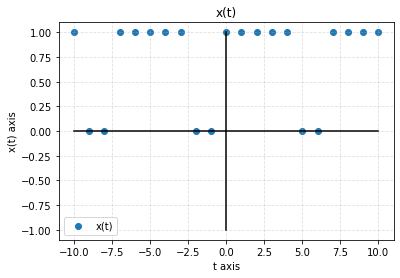

In [ ]:
# RECONSTRUÇÃO DO SINAL DO 1º GRÁFICO DA QUESTÃO 3.28 A)

t = interval(-10, 10)

N = 7
c_0 = 5/7
c = 1/7
c_exp = (4/7) * pi * 1j
c_sin1 = (5/7) * pi
c_sin2 = (1/7) * pi
wo = (2/7) * pi

c_ak = Coefficients(N, c_0, c, c_exp, c_sin1, c_sin2, wo)

x = build_signal("x(t)", c_ak, t)

plot(x)

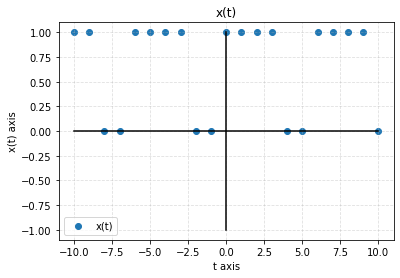

In [ ]:
# RECONSTRUÇÃO DO SINAL DO 2º GRÁFICO DA QUESTÃO 3.28 A)

t = interval(-10, 10)

N = 6
c_0 = 4/6
c = 1/6
c_exp = (1/2) * pi * 1j
c_sin1 = (2/3) * pi
c_sin2 = (1/6) * pi
wo = (1/3) * pi

c_ak = Coefficients(N, c_0, c, c_exp, c_sin1, c_sin2, wo)

x = build_signal("x(t)", c_ak, t)

plot(x)

# Decomposição de sinais:

Caso o sinal seja decomposto em mais de um sinal, é possível reconstrui-los separadamente e depois somá-los por meio do método ```sum_functions```, que recebe duas ```Functions``` e retorna uma ```Function```, como se pode ver na célula abaixo:

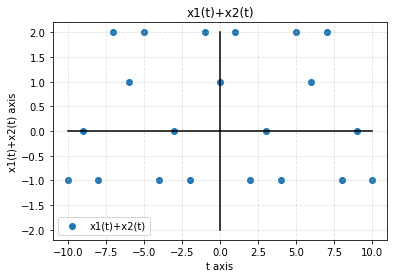

In [ ]:
# RECONSTRUÇÃO DO SINAL DO 3º GRÁFICO DA QUESTÃO 3.28 A)

t = interval(-10, 10)

N = 6
c_0 = 1/2
c = 1/3
c_exp = 0
c_sin1 = (1/2) * pi
c_sin2 = (1/6) * pi
wo = (1/3) * pi

# reconstrução do sinal x1(t):
c_ak1 = Coefficients(N, c_0, c, c_exp, c_sin1, c_sin2, wo)
x1 = build_signal("x1(t)", c_ak1, t)

N = 2
c_0 = 0
c = -1/2 
c_exp = c_sin1 = c_sin2 = 0
wo = pi

# reconstrução do sinal x2(t):
c_ak2 = Coefficients(N, c_0, c, c_exp, c_sin1, c_sin2, wo) 
x2 = build_signal("x2(t)", c_ak2, t)

# soma de x1(t) e x2(t)
x = sum_functions(x1, x2)

plot(x)